# RECONOCIMIENTO DE EXPRESIONES FACIALES 

Librerias 

In [6]:
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import random

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

Cargar dataset 

In [7]:
# Definir carpetas y parámetros
TRAIN_DIR = './data/images/train/'
TEST_DIR = './data/images/test/'
IMG_SIZE = 48
BATCH_SIZE = 32
EPOCHS = 30


In [33]:
import os

TRAIN_DIR = './data/images/train/'

for root, dirs, files in os.walk(TRAIN_DIR):
    print(f"En el directorio {root}:")
    print(f"Subdirectorios: {dirs}")
    print(f"Archivos: {files}")
    print("\n")

En el directorio ./data/images/train/:
Subdirectorios: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Archivos: []


En el directorio ./data/images/train/angry:
Subdirectorios: []
Archivos: ['0.jpg', '1.jpg', '10.jpg', '10002.jpg', '10016.jpg', '10037.jpg', '10038.jpg', '10057.jpg', '10063.jpg', '10069.jpg', '10100.jpg', '10105.jpg', '10115.jpg', '10122.jpg', '10142.jpg', '1015.jpg', '10154.jpg', '10155.jpg', '10158.jpg', '1016.jpg', '10167.jpg', '10178.jpg', '1018.jpg', '10181.jpg', '10192.jpg', '10196.jpg', '10202.jpg', '10207.jpg', '10214.jpg', '10223.jpg', '10226.jpg', '10240.jpg', '10242.jpg', '10250.jpg', '10251.jpg', '10253.jpg', '10265.jpg', '10287.jpg', '10302.jpg', '10310.jpg', '10325.jpg', '10348.jpg', '10359.jpg', '10363.jpg', '10364.jpg', '10373.jpg', '10377.jpg', '10378.jpg', '10385.jpg', '10388.jpg', '1039.jpg', '10394.jpg', '10397.jpg', '10401.jpg', '10420.jpg', '10429.jpg', '10430.jpg', '10431.jpg', '10439.jpg', '10440.jpg', '10441.jpg', '10462.jpg

1

2

In [28]:
# Definir carpetas y parámetros
TRAIN_DIR = './data/images/train/'
TEST_DIR = './data/images/test/'
IMG_SIZE = 48
BATCH_SIZE = 32
EPOCHS = 30

# Función de preprocesamiento
def preprocess_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Leer imagen en escala de grises
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Redimensionar a 48x48
    img = img / 255.0  # Normalizar
    return img

# Cargar datos
def load_data(directory):
    X = []
    y = []
    filenames = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                file_path = os.path.join(root, file)
                try:
                    img = preprocess_image(file_path)
                    X.append(img)
                    # Extraer la etiqueta de la carpeta padre
                    label = os.path.basename(root)
                    y.append(0 if label == 'sad' else 1)  # 0: sad, 1: happy
                    filenames.append(file)
                except Exception as e:
                    print(f'Error al cargar {file_path}: {e}')
                    
    return np.array(X), np.array(y), filenames

# Cargar datos de entrenamiento y prueba
X_train, y_train, train_filenames = load_data(TRAIN_DIR)
X_test, _, test_filenames = load_data(TEST_DIR)

# Asegurarse de que las imágenes sean de 48x48x1 (1 canal para escala de grises)
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [17]:
# Crear el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [22]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Aumentación de datos
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [24]:
# Entrenar el modelo
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=(X_val, y_val)
)

Epoch 1/30
  1/721 ━━━━━━━━━━━━━━━━━━━━ 20:37 2s/step - accuracy: 0.5625 - loss: 0.6854

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


721/721 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8233 - loss: 0.4750 - val_accuracy: 0.8343 - val_loss: 0.4433
Epoch 2/30
721/721 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8301 - loss: 0.4546 - val_accuracy: 0.8343 - val_loss: 0.4422
Epoch 3/30
721/721 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8280 - loss: 0.4501 - val_accuracy: 0.8343 - val_loss: 0.4229
Epoch 4/30
721/721 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8272 - loss: 0.4413 - val_accuracy: 0.8343 - val_loss: 0.4309
Epoch 5/30
721/721 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8255 - loss: 0.4383 - val_accuracy: 0.8343 - val_loss: 0.3999
Epoch 6/30
721/721 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8244 - loss: 0.4278 - val_accuracy: 0.8343 - val_loss: 0.3981
Epoch 7/30
721/721 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8299 - loss: 0.4107 - val_accuracy: 0.8340 - val_loss: 0.4014
Epoch 8/30
721/721 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8216 - loss: 0.4082 - val_accurac

In [25]:
# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validación - Pérdida: {val_loss}, Precisión: {val_accuracy}')

181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8384 - loss: 0.3748
Validación - Pérdida: 0.362928569316864, Precisión: 0.8424978256225586


In [27]:
# Predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5).astype(int).flatten()


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [29]:
# Guardar las predicciones en el formato requerido
submission = pd.DataFrame({'Image': test_filenames, 'Prediction': y_test_pred})
submission.to_csv('submission.csv', index=False)

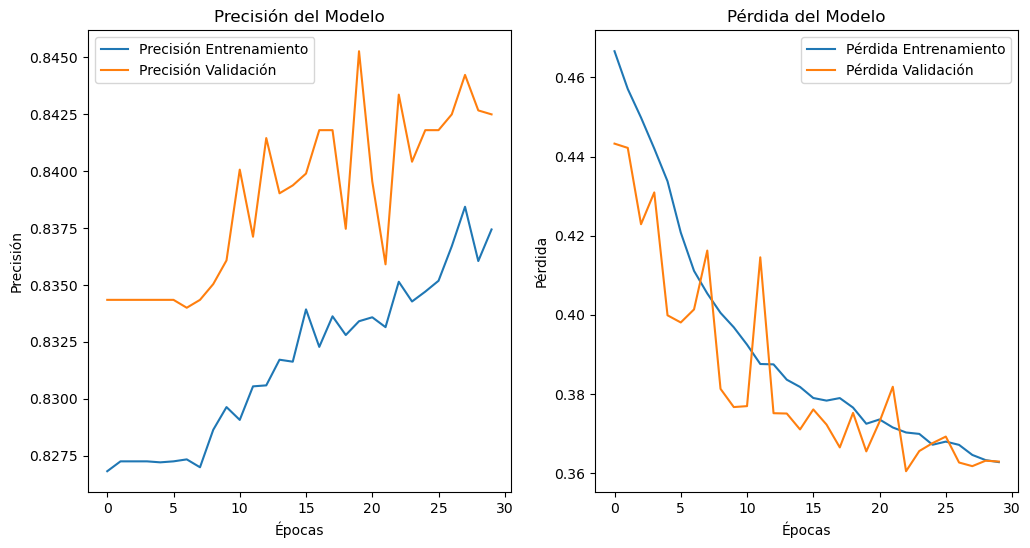

In [30]:
# Opcional: Visualización de resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión del Modelo')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida del Modelo')
plt.show()

3

In [8]:

# Verificar estructura de directorios y contenido
def verify_directories(directory):
    for root, dirs, files in os.walk(directory):
        print(f"Directorio: {root}")
        print(f"Subdirectorios: {dirs}")
        print(f"Archivos: {files}")

print("Contenido del directorio de entrenamiento:")
verify_directories(TRAIN_DIR)

print("\nContenido del directorio de prueba:")
verify_directories(TEST_DIR)

Contenido del directorio de entrenamiento:
Directorio: ./data/images/train/
Subdirectorios: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Archivos: []
Directorio: ./data/images/train/angry
Subdirectorios: []
Archivos: ['0.jpg', '1.jpg', '10.jpg', '10002.jpg', '10016.jpg', '10037.jpg', '10038.jpg', '10057.jpg', '10063.jpg', '10069.jpg', '10100.jpg', '10105.jpg', '10115.jpg', '10122.jpg', '10142.jpg', '1015.jpg', '10154.jpg', '10155.jpg', '10158.jpg', '1016.jpg', '10167.jpg', '10178.jpg', '1018.jpg', '10181.jpg', '10192.jpg', '10196.jpg', '10202.jpg', '10207.jpg', '10214.jpg', '10223.jpg', '10226.jpg', '10240.jpg', '10242.jpg', '10250.jpg', '10251.jpg', '10253.jpg', '10265.jpg', '10287.jpg', '10302.jpg', '10310.jpg', '10325.jpg', '10348.jpg', '10359.jpg', '10363.jpg', '10364.jpg', '10373.jpg', '10377.jpg', '10378.jpg', '10385.jpg', '10388.jpg', '1039.jpg', '10394.jpg', '10397.jpg', '10401.jpg', '10420.jpg', '10429.jpg', '10430.jpg', '10431.jpg', '10439.jpg', '10440.

In [9]:
# Preprocesar imágenes manualmente si hay problemas con flow_from_directory
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    img = img / 255.0  # Normalización
                    images.append(img)
                    labels.append(label)
            except Exception as e:
                print(f'Error al cargar la imagen {img_path}: {e}')
    return images, labels


In [10]:
# Cargar imágenes y etiquetas
X_train = []
y_train = []

In [11]:
# Cargar imágenes de la clase 'sad'
sad_folder = os.path.join(TRAIN_DIR, 'sad')
if os.path.exists(sad_folder):
    sad_images, sad_labels = load_images_from_folder(sad_folder, 0)
    X_train.extend(sad_images)
    y_train.extend(sad_labels)
else:
    print(f"No se encontró el directorio {sad_folder}")


In [12]:

# Cargar imágenes de la clase 'happy'
happy_folder = os.path.join(TRAIN_DIR, 'happy')
if os.path.exists(happy_folder):
    happy_images, happy_labels = load_images_from_folder(happy_folder, 1)
    X_train.extend(happy_images)
    y_train.extend(happy_labels)
else:
    print(f"No se encontró el directorio {happy_folder}")


In [13]:
# Convertir a arrays y ajustar la forma
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

In [14]:
# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
# Crear el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Aumentación de datos
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [18]:
# Entrenar el modelo
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=(X_val, y_val)
)

Epoch 1/30
  4/303 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.3691 - loss: 0.7023

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5759 - loss: 0.6788 - val_accuracy: 0.6460 - val_loss: 0.6380
Epoch 2/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6100 - loss: 0.6589 - val_accuracy: 0.6439 - val_loss: 0.6246
Epoch 3/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6425 - loss: 0.6420 - val_accuracy: 0.6985 - val_loss: 0.5609
Epoch 4/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6855 - loss: 0.5786 - val_accuracy: 0.7658 - val_loss: 0.4574
Epoch 5/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7397 - loss: 0.5090 - val_accuracy: 0.8125 - val_loss: 0.3991
Epoch 6/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7708 - loss: 0.4760 - val_accuracy: 0.8335 - val_loss: 0.3659
Epoch 7/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7936 - loss: 0.4331 - val_accuracy: 0.8269 - val_loss: 0.3691
Epoch 8/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8040 - loss: 0.4172 - val_accuracy: 0.842

In [19]:
# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validación - Pérdida: {val_loss}, Precisión: {val_accuracy}')

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8891 - loss: 0.2570
Validación - Pérdida: 0.26240983605384827, Precisión: 0.8839322328567505


In [2]:
# Cargar imágenes de prueba
X_test = []
test_filenames = []
for filename in os.listdir(TEST_DIR):
    img_path = os.path.join(TEST_DIR, filename)
    if os.path.isfile(img_path):
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = img / 255.0  # Normalización
                X_test.append(img)
                test_filenames.append(filename)
        except Exception as e:
            print(f'Error al cargar la imagen {img_path}: {e}')

NameError: name 'os' is not defined

In [21]:
# Convertir a numpy arrays y ajustar la forma
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [22]:
# Predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5).astype(int).flatten()

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [23]:
# # Guardar las predicciones en el formato requerido
# submission = pd.DataFrame({'image': test_filenames, 'emotion': y_test_pred})
# submission.to_csv('submission.csv', index=False)

nueva subida

In [1]:
# Crear el DataFrame para la submission
submission_data = {
    'id_img': [os.path.splitext(f)[0] for f in test_filenames],  # Extraer nombre del archivo sin extensión
    'emotion': y_test_pred  # Predicciones de emociones
}
submission_df = pd.DataFrame(submission_data)


NameError: name 'test_filenames' is not defined

In [ ]:
# Guardar en CSV
submission_file = 'submission.csv'
submission_df.to_csv(submission_file, index=False)

print(f'Submission guardada en {submission_file}')

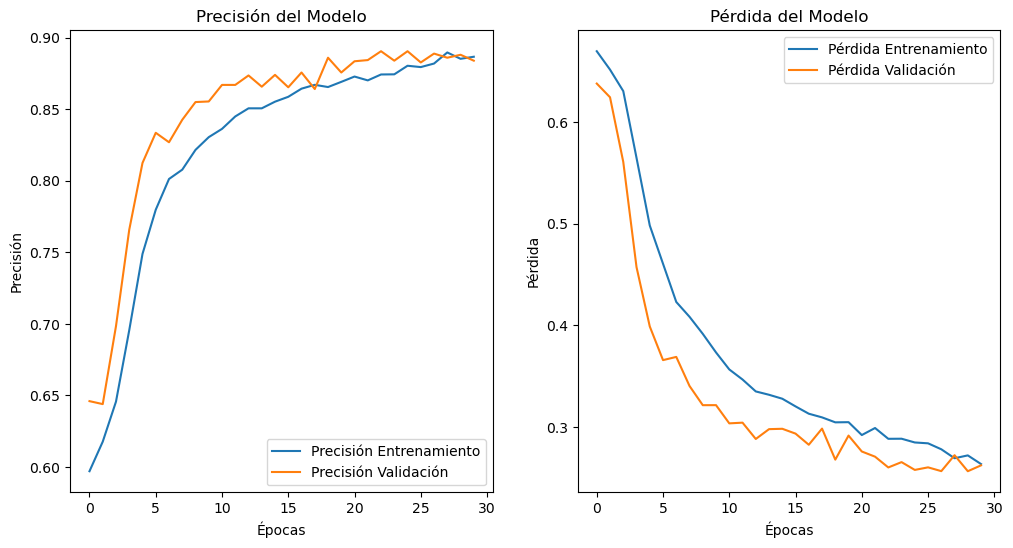

In [24]:
# Visualización de resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión del Modelo')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida del Modelo')
plt.show()